<a href="https://colab.research.google.com/github/dianaamonrooy/Algoritmos/blob/main/Lab_genetics/Lab_Gen%C3%A9tico%20(Enfoques_decimal_y_binario).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Genético**

## **Desarrollo del Algoritmo: Implementación Decimal**

In [ ]:
# Libraries required
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
# Function to turn the genome list of an individual into a decimal
def listToDecimal(L):
    decimal = 0
    for i in range(len(L)):
        decimal += L[i] * 10**(-i)
    return decimal

In [ ]:
# Final Algorithm
def geneticAlgorithm(genomeSize, populationSize, mutationProbability, numGenerations, functionToOptimize, searchRange):
  
  # Define the function to optimize
  def function(x):
    return eval(functionToOptimize, {"x" : x, "math":__import__('math')}) 

  # Function to graph the function curve and the individuals
  def graphFunction(title, population, x_values, y_values):
    plt.figure()
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x_values, y_values)
    for individual in population:
      x = listToDecimal(individual)
      y = function(x)
      plt.plot(x, y,'x')   

  # Define the genetic pool
  firstGeneOptions = list(range(0, searchRange))
  otherGenesOptions = [0,1,2,3,4,5,6,7,8,9]
  geneticPool = [firstGeneOptions, otherGenesOptions]
  
  # Create initial population
  population = []
  for i in range(populationSize):
    individual = []
    individual += [np.random.choice(geneticPool[0])]
    individual += list(np.random.choice(geneticPool[1], genomeSize-1))
    population.append(individual)
  
  # We get the values needed to graph the function
  y_values = []
  x_values = np.arange(0, searchRange, 0.01)  
  for num in x_values:
    y_values.append(function(num))
  
  # Let's graph the first population
  graphFunction("First Population", population, x_values, y_values)

  # These lists will be useful for the plots later
  errorList = []
  bestIndividualList = []
  generationsList = list(range(numGenerations))

  # We cycle and repeat the process for every generation
  for var in range(numGenerations):
    # The list "fitness" contains f(x) of each member of the population
    fitness =[]
    for individual in population:
      x = listToDecimal(individual)
      y = function(x)
      fitness.append(y)
      
    # We obtain the success probabilities for each element in "fitness"
    sumFitness = sum(fitness)
    for i in range(len(fitness)):
      fitness[i] = fitness[i] / sumFitness

    # Now it's time to reproduce
    descendants = []
    # We need to find (populationSize/2) couples
    for i in range(populationSize//2):
      # We obtain two numbers, which corresponds to the indexes of the parents,
      # according to their probability of success
      parents = np.random.choice(populationSize, 2, p = fitness)
      # We obtain the two parents
      parent1 = population[parents[0]]
      parent2 = population[parents[1]]
      # The cross point is random and it determines the point at which 
      # the parents' genome will split, to create their children's genome 
      splitPoint = np.random.randint(genomeSize)
      # We get two descendants for every couple (to maintain the population number)
      descendants += [parent1[:splitPoint] + parent2[splitPoint:]]
      descendants += [parent2[:splitPoint] + parent1[splitPoint:]]

    # The old generation dies, and the descendants become the new population
    population = descendants

    # Every generation can mutate
    for i in range(len(population)):
      # Every individual is a possible mutant
      possibleMutant = population[i]
      # The first gene mutates according to the mutationProbability
      if np.random.random() < mutationProbability:
        mutation = np.random.choice(geneticPool[0])
        possibleMutant[0] = mutation   
      # The remaining genes also mutate according to the mutationProbability
      for j in range(1, len(possibleMutant)):
        if np.random.random() < mutationProbability:
          mutation = np.random.choice(geneticPool[1])
          possibleMutant[j] = mutation
      # We update the population, including the mutant, if that's the case
      population[i] = possibleMutant

    # We calculate the average error and best member of the current generation
    valuesY = []
    for individual in population:
      x = listToDecimal(individual)
      y = function(x)
      valuesY.append(y)
    avgError = np.std(valuesY, ddof=1) / np.sqrt(np.size(valuesY))
    bestMember = max(valuesY)
    bestIndividualList.append(bestMember)
    errorList.append(avgError)

    # Let's plot the last population
    if var == numGenerations - 1:
      graphFunction("Last Population", population, x_values, y_values)
  
  # When we end, we plot the Average error through the generations
  plt.figure()
  plt.title("Average error through the generations")
  plt.xlabel("Generations")
  plt.ylabel("Average Error")
  plt.plot(generationsList, errorList)  

  # We also plot the best individual's value through the generations
  plt.figure()
  plt.title("Best y-value through the generations")
  plt.xlabel("Generations")
  plt.ylabel("y")
  plt.plot(generationsList, bestIndividualList)  

Veámoslo en funcionamiento

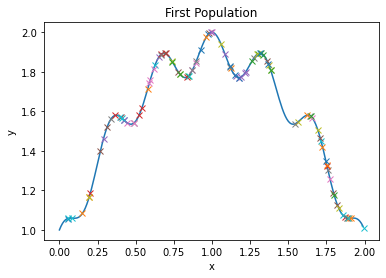

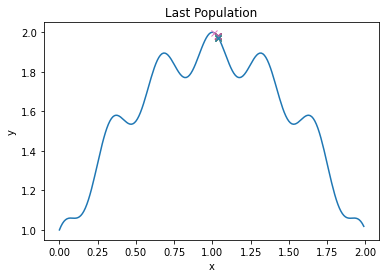

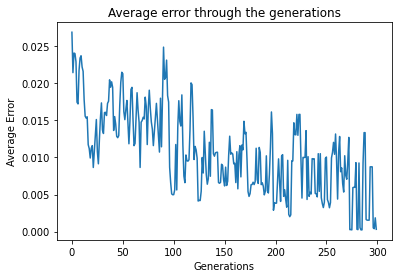

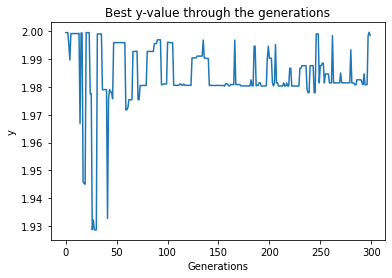

In [ ]:
# We define the parameters
genomeSize = 15
populationSize = 100
mutationProbability = 0.005
numGenerations = 300
functionToOptimize = '-(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2'
searchRange = 2

#We run the algorithm
geneticAlgorithm(genomeSize, populationSize, mutationProbability, numGenerations, functionToOptimize, searchRange)

## **Alterno: Implementación Binaria**




In [2]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import math
import os

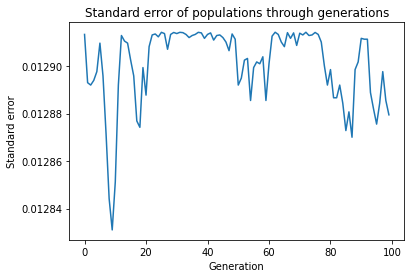

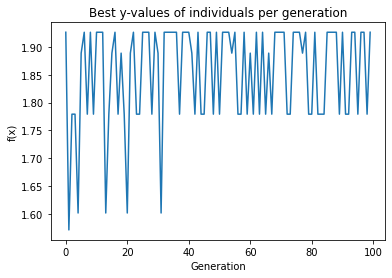

<Figure size 432x288 with 0 Axes>

In [12]:
def genetic(individuals_genome_size, population_size, mutation_prob, generations, function, search_range):

  ''' sums the 1's of the gen and divides it into the length of the gen'''
  def bin_decimal(num_binario):
    ans = (np.sum(num_binario)/len(num_binario))*max(search_range)
    if math.modf(ans)[1] == 0: # integer part of the number
      ans = ans + min(search_range)
    return ans

  '''evaluates the given function'''
  def fx(x):
    return eval(function,{"x" : x, "math":__import__('math')}) 

  '''mutates 0 or more genes of an individual'''
  def mutate(individuals, prob, pool):
    for i in range(len(individuals)):
      mutate_individual = individuals[i]
      for j in range(len(mutate_individual)):
          if np.random.random() < prob:
              mutation = np.random.choice(pool)
              mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]#+1 permite omitir el gen antiguo por el mutado
      individuals[i] = mutate_individual

  # defines the axis of the graphs to be ploted - plots the given function
  y_axis = []
  x_axis=np.arange(search_range[0],search_range[1],0.02)
  for num in x_axis:
    y_axis.append(fx(num))
  os.makedirs(function, exist_ok=True)

  # creates the initial population
  population = []
  best_individuals = []
  error = []
  genetic_pool = [0,1] # --> binary approach
  for i in range(population_size):
      individual = list(np.random.choice(genetic_pool,individuals_genome_size))
      population.append(individual)

  # iters over num. of generations
  for gen in range(generations):

    # fitness (success)
    fitness =[]
    for individual in population:
      x = bin_decimal(individual)
      y = fx(x)
      fitness += [y]

    fitness = np.array(fitness)
    # fitness' normalization
    fitness = fitness/fitness.sum()

    # reproduction
    offspring = []
    for i in range(population_size//2):
        parents = np.random.choice(population_size, 2, p=fitness)
        cross_point = np.random.randint(individuals_genome_size)
        offspring += [population[parents[0]][:cross_point] + population[parents[1]][cross_point:]]
        offspring += [population[parents[1]][:cross_point] + population[parents[0]][cross_point:]]

    population = offspring

    # mutation
    mutate(population,mutation_prob,genetic_pool)

    # best individual --> np.where(fitness == fitness.max()) --> since there are multiple individuals, we take the first of the array
    best_individual_idx = np.where(fitness == fitness.max())[0][0]
    best_individual = population[best_individual_idx]
    best_individuals += [fx(bin_decimal(best_individual))]

    # standard error of the current population
    error += [np.std(population, ddof=1) / np.sqrt(np.size(population))]

  # graphs "Standard error through generations"
  plt.clf()
  plt.xlabel("Generation")
  plt.ylabel("Standard error")
  plt.title('Standard error of populations through generations')
  plt.plot(np.arange(0,len(error),1),error)
  plt.show()
  plt.savefig(function+'/standard-error.png')

  # graphs the best individual
  plt.clf()
  plt.xlabel("Generation")
  plt.ylabel("f(x)")
  plt.title('Best y-values of individuals per generation')
  plt.plot(np.arange(0, len(best_individuals), 1), best_individuals)
  plt.show()
  plt.savefig(function + '/best-individual.png')
  
  


# individuals_genome_size   = ej. 15
# population_size           = ej. 100
# mutation_prob_generations = ej. 0.005
# generations               = ej. 100
# fx                        = ej: -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2
# search_range              = ej. 0 - 2
genetic(15,100,0.005,100,'-(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2',(0,2))